# 데이터 불러오기

In [3]:
import pandas as pd

df_data = pd.read_csv('trace.csv')
df_data.head()

,timestamp,region,latitude,longitude,20:19:00:00:03:21,20:19:00:00:02:81,20:19:00:00:01:43,20:19:00:00:03:23,20:19:00:00:00:98,20:19:00:00:00:08,...,20:19:00:00:03:22,20:19:00:00:00:58,20:19:00:00:00:34,20:19:00:00:01:08,20:19:00:00:00:62,20:19:00:00:00:30,20:19:00:00:01:96,20:19:00:00:01:34,20:19:00:00:01:41,20:19:00:00:00:24
0,61.472,0,43.718277,10.421566,NaN,NaN,NaN,NaN,-37.0,NaN,...,NaN,-37.0,-86.0,NaN,NaN,NaN,NaN,NaN,-61.0,NaN
1,68.396,0,43.718301,10.421608,NaN,NaN,NaN,NaN,-48.0,-86.0,...,NaN,-45.0,-81.0,NaN,NaN,NaN,NaN,NaN,-79.0,NaN
2,72.410,1,43.718326,10.421649,NaN,NaN,NaN,NaN,-66.0,-66.0,...,NaN,-53.0,-78.0,NaN,NaN,NaN,-92.0,NaN,NaN,NaN
3,76.387,1,43.718350,10.421691,NaN,NaN,NaN,NaN,-68.0,-62.0,...,NaN,-64.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80.398,1,43.718375,10.421733,NaN,NaN,NaN,NaN,-70.0,NaN,...,NaN,-65.0,-50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_data = df_data.fillna(-120)

# KNN으로 학습하기

## STEP1. 입력데이터 포멧 맞추기

In [25]:
import numpy as np
ips_data = np.array(df_data)

print(ips_data.shape)

(103, 231)


In [26]:
ips_x = ips_data[:, 4:]
ips_x.shape

(103, 227)

In [27]:
print(ips_x[0])

[-120. -120. -120. -120.  -37. -120. -120. -120. -120. -120.  -32. -120.
 -120.  -63. -120.  -36. -120. -120.  -63. -120. -120. -120. -120. -120.
 -120.  -33. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120.
 -120. -120. -120. -120. -120. -120. -120. -120. -120.  -92. -120. -120.
 -120. -120. -120. -120.  -60. -120. -120. -120. -120. -120. -120.  -62.
 -120. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120.
 -120. -120.  -86. -120.  -82. -120. -120. -120. -120. -120.  -81. -120.
  -63. -120.  -81. -120. -120. -120. -120. -120. -120. -120. -120. -120.
  -83. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120.
  -82. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120.
 -120. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120.
 -120. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120. -120.
 -120. -120. -120.  -89. -120. -120. -120. -120. -120. -120. -120. -120.
 -120.  -63. -120. -120. -120. -120. -120.  -81. -1

In [40]:
ips_y = ips_data[:, 1:2]
ips_y = ips_y.reshape(-1)
ips_y = ips_y.astype(np.int32)
print(ips_y)

[0 0 1 1 1 2 2 3 3 3 4 4 4 4 4 3 3 2 2 2 1 1 0 0 0 0 0 1 1 1 2 2 2 3 3 3 4
 4 4 4 4 3 3 2 2 2 1 1 0 0 0 0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 4 4 4 3 3 3 2 2
 2 1 1 1 0 0 0 0 0 1 1 2 2 3 3 4 4 4 4 4 3 3 2 2 1 1 0 0 0]


## STEP2. Training & Test set 으로 나눠주기

In [41]:
from sklearn import model_selection

train_x, test_x, train_y, test_y = model_selection.train_test_split(ips_x, ips_y, test_size=0.3, random_state=0)

print("x_train:", train_x.shape, "y_train:", train_y.shape)
print("x_test: ", test_x.shape, "y_test: ", test_y.shape)

x_train: (72, 227) y_train: (72,)
x_test:  (31, 227) y_test:  (31,)


## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier() # 모델 생성
model.fit(train_x, train_y)    # 모델 학습

KNeighborsClassifier()

In [51]:
model.score(test_x, test_y)

0.6451612903225806

In [52]:
hit = 0
total = 0
for idx in range(len(test_x)):
    actual = test_y[idx]
    predicted = model.predict(test_x[idx].reshape(1,-1))
    total += 1
    print(f"[{idx:02d}] actual={actual}, predicted={predicted} - {actual==predicted}")
    if actual == predicted[0]:
        hit += 1

print(f"Accuracy: {hit/total} ({hit}/{total})")

[00] actual=0, predicted=[0] - [ True]
[01] actual=3, predicted=[2] - [False]
[02] actual=1, predicted=[1] - [ True]
[03] actual=0, predicted=[0] - [ True]
[04] actual=3, predicted=[4] - [False]
[05] actual=1, predicted=[1] - [ True]
[06] actual=3, predicted=[4] - [False]
[07] actual=4, predicted=[4] - [ True]
[08] actual=1, predicted=[1] - [ True]
[09] actual=0, predicted=[1] - [False]
[10] actual=1, predicted=[1] - [ True]
[11] actual=3, predicted=[3] - [ True]
[12] actual=1, predicted=[2] - [False]
[13] actual=4, predicted=[4] - [ True]
[14] actual=3, predicted=[2] - [False]
[15] actual=2, predicted=[1] - [False]
[16] actual=0, predicted=[1] - [False]
[17] actual=0, predicted=[0] - [ True]
[18] actual=3, predicted=[2] - [False]
[19] actual=3, predicted=[3] - [ True]
[20] actual=2, predicted=[2] - [ True]
[21] actual=1, predicted=[2] - [False]
[22] actual=1, predicted=[1] - [ True]
[23] actual=2, predicted=[2] - [ True]
[24] actual=2, predicted=[2] - [ True]
[25] actual=2, predicted=

## SVM

In [54]:
from sklearn import svm

model = svm.SVC() # 모델 생성
model.fit(train_x, train_y)    # 모델 학습

SVC()

In [55]:
model.score(test_x, test_y)

0.5806451612903226

## GaussianProcessClassifier

In [56]:
from sklearn.gaussian_process import GaussianProcessClassifier
model = GaussianProcessClassifier() # 모델 생성
model.fit(train_x, train_y)    # 모델 학습

GaussianProcessClassifier()

In [58]:
model.score(test_x, test_y)

0.06451612903225806

# sklearn classifiers
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

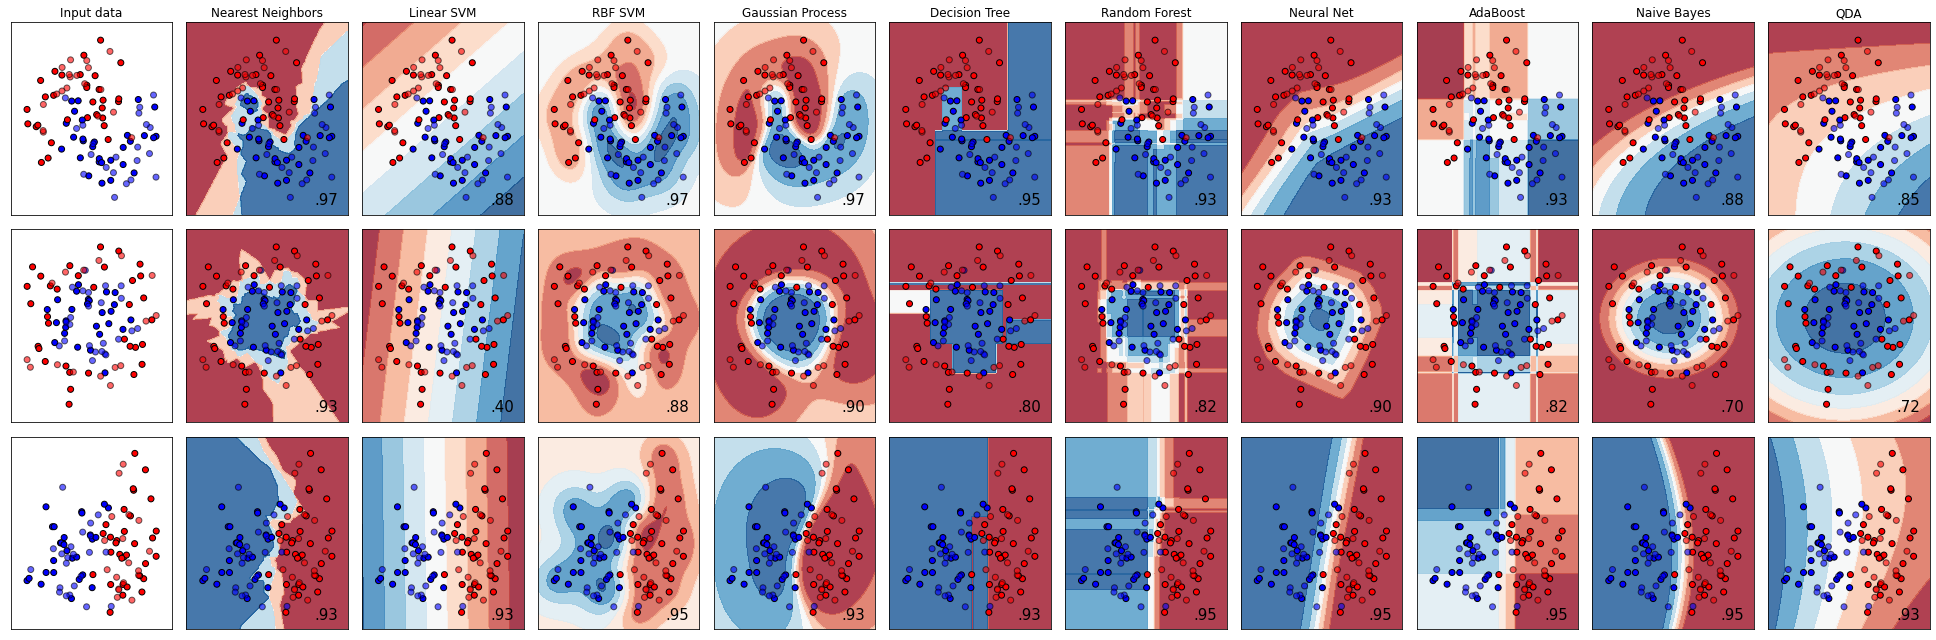

In [60]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()